<b>
HW02
</b>


In this program $\frac{1}{4\pi \epsilon_0}$  is set to one since it is only a number.


In [22]:
import scipy.integrate as sci
import numpy as np
import math
from math import pi,cos ,sin
%matplotlib inline
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

<b>
1D case: electric potential and electric field on x axis from -10 to +10 (0-1 excluded) are  calculated and ploted
</b>

<h2></h2>
<img src="img1.jpeg"  width="400" height="100">



/Users/MaedeMohadesin/anaconda/lib/python3.5/site-packages/scipy/integrate/quadrature.py:709: AccuracyWarning: divmax (10) exceeded. Latest difference = 5.617210e-01
  AccuracyWarning)
/Users/MaedeMohadesin/anaconda/lib/python3.5/site-packages/scipy/integrate/quadrature.py:709: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.572866e+00
  AccuracyWarning)
/Users/MaedeMohadesin/anaconda/lib/python3.5/site-packages/scipy/integrate/quadrature.py:709: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.071630e+13
  AccuracyWarning)
/Users/MaedeMohadesin/anaconda/lib/python3.5/site-packages/scipy/integrate/quadrature.py:709: AccuracyWarning: divmax (10) exceeded. Latest difference = 4.130402e+00
  AccuracyWarning)
/Users/MaedeMohadesin/anaconda/lib/python3.5/site-packages/scipy/integrate/quadrature.py:709: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.068673e+01
  AccuracyWarning)


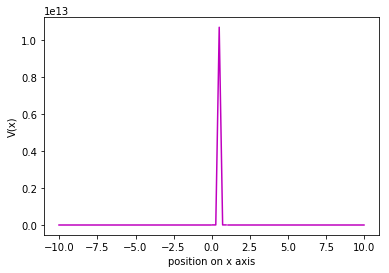

In [23]:
f=lambda x,xp: 2*xp/abs(x-xp)
xp=np.linspace(0,1,100)
farray=np.vectorize(f)
x1=np.linspace(-10,-.05,50)
x2=np.linspace(1.05,10,50)
x3=np.linspace(0.05,.95,5)
v1=[]
v2=[]
v3=[]
for i in x1:
    array=farray(i,xp)
    v1.append(sci.trapz(xp,array))
for j in x2:
    array=farray(j,xp)
    v2.append(sci.trapz(xp,array))
for k in x3:
    f3=lambda xp: 2*xp/abs(k-xp)
    v3.append(sci.romberg(f3,0,1))


    

pyplot.plot(x1,v1,'m-',x2,v2,'m-',x3,v3,'m-')
pyplot.xlabel('position on x axis')
pyplot.ylabel('V(x)')



This charge distributio  is positive and is limited to x axis from 0 to 1 so from a far distance it looks like a point charge so it's reasonable for potential to look like a delta function. 

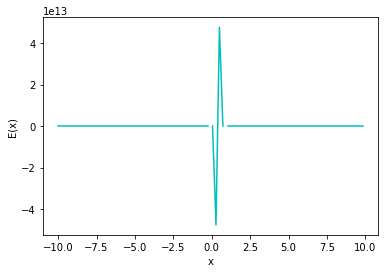

In [24]:
# Electric field
E1=-np.diff(v1)/np.diff(x1)
E2=-np.diff(v2)/np.diff(x2)
E3=-np.diff(v3)/np.diff(x3)
pyplot.plot(x1[0:49],E1,'c-',x2[0:49],E2,'c-',x3[0:4],E3,'c-')
pyplot.xlabel('x')
pyplot.ylabel('E(x)')




Due to the above reasoning the electric field is also expected to look like a delta function but at x=0 all the charges are on the right side so E is directed toward -x direction and as we increase x magnitude of electric field deacreses and we reach to the point where charges on the both side are equal and E=0, then by increasing x electric field becomes larger and positive until x is much larger than the size of the distribution and finally E goes to zero. 

<b>
1D case: electric potential and electric field are calculated at distance d from the origin  
</b>

<h2></h2>
<img src="img2.jpeg"  width="400" height="333">



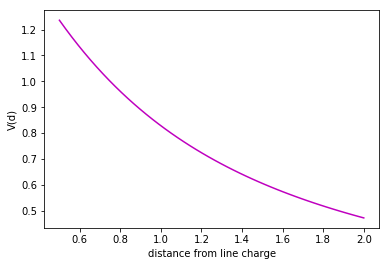

In [25]:

d=np.linspace(0.5,2,50)

v=[]

for h in d:
    f=lambda xp: 2*xp/math.sqrt(h**2+xp**2)
    v.append(sci.romberg(f,0,1))

    

pyplot.plot(d,v,'m-')
pyplot.xlabel('distance from line charge')
pyplot.ylabel('V(d)')




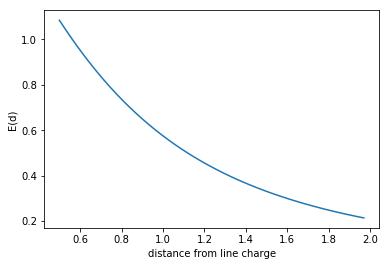

In [26]:
# Electric field
E1=-np.diff(v)/np.diff(d)

pyplot.plot(d[0:49],E1)
pyplot.xlabel('distance from line charge')
pyplot.ylabel('E(d)')





<b>
As expected the potential deacreases as distance to the charge distribution increases.
</b>




<b>
2D case: electric potential and electric field are calculated at point (x,y,z). 
Net potential is the sum of potential due to charge distribution on x axis and charge distribution on y axis.
</b>


<h2> </h2>
<img src="img3.jpeg"  width="400" height="333">




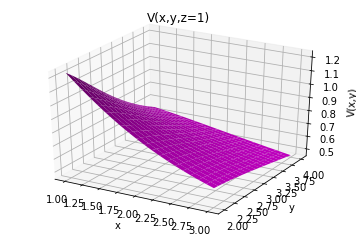

In [95]:
x=np.linspace(1,3,20)
y=np.linspace(2,4,20)
z=np.linspace(1,3,5)
v1=np.zeros((len(x),len(y),len(z)))
v2=np.zeros((len(x),len(y),len(z)))
v=np.zeros((len(x),len(y),len(z)))

for i in range(0,len(x)) :
    for j in range(0,len(y)) :
        for k in range(0,len(z)):
            f1=lambda xp: xp**2/math.sqrt((x[i]-xp)**2+(y[j]-1)**2+z[k]**2)
            f2=lambda yp: yp/math.sqrt(x[i]**2+(y[j]-yp)**2+z[k]**2)
            v1[j,i,k]=sci.romberg(f1,0,1)
            v2[j,i,k]=sci.romberg(f2,1,2)
            v[j,i,k]=v1[j,i,k]+v2[j,i,k]
        

varray=np.zeros((len(x),len(y)))        
for i in range(0,len(x)) :
    for j in range(0,len(y)) : 
        varray[j,i]=v[j,i,0]


fig = pyplot.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, varray,shade=True,color='m')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V(x,y)')
ax.set_title('V(x,y,z=1)')




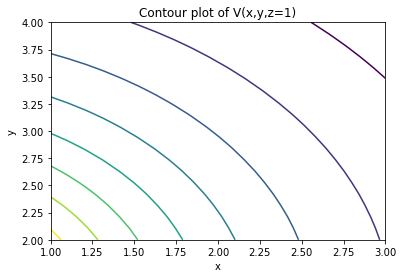

In [96]:
pyplot.contour(X,Y,varray)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.title('Contour plot of V(x,y,z=1)')

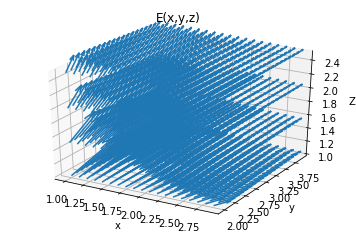

In [104]:
# electric field
Ex=-np.diff(v,axis=1)/.1
Ey=-np.diff(v,axis=0)/.1
Ez=-np.diff(v,axis=2)/.4

Ex=np.delete(Ex,19,0)
Ex=np.delete(Ex,4,2)
Ey=np.delete(Ey,19,1)
Ey=np.delete(Ey,4,2)
Ez=np.delete(Ez,19,1)
Ez=np.delete(Ez,19,0)




X, Y, Z = np.meshgrid(x[0:19], y[0:19], z[0:4])
fig = pyplot.figure()
ax = fig.gca(projection='3d')
ax.quiver( X, Y,Z, Ex, Ey, Ez)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Z')
ax.set_title('E(x,y,z)')


pyplot.show()



<b>
Since electric fields arrows are not clear in this plot, a 2D plot of electric field at z=1 is also drawn below:
</b>

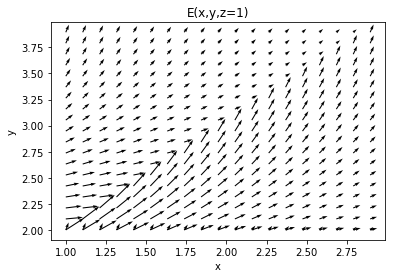

In [109]:
Ex=-np.diff(varray,axis=1)/.1
Ey=-np.diff(varray,axis=0)/.1

X, Y = np.meshgrid(x[0:19], y[0:19])
fig, ax = pyplot.subplots()
q = ax.quiver(X, Y, Ex, Ey)
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_title('E(x,y,z=1)')




<b>
2D case: electric potential and electric field are calculated on a x-y plane at distance z above the disk (here z=2).
</b>

<h2></h2>
<img src="img4.jpeg"  width="500" height="333">



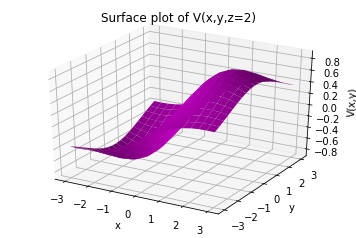

In [119]:
x=np.linspace(-3,+3,20)
y=np.linspace(-3,+3,20)
z=2
v=np.zeros((len(x),len(y)))
for i in range(0,len(x)):
    for j in range (0,len(y)):
        f=lambda r,t : cos(t)*r**2/math.sqrt((x[i]-r*cos(t))**2 + (y[j]-r*sin(t))**2 + z**2 )
        integral=sci.nquad(f,[[0,2],[0,2*pi]])
        v[j,i]=integral[0]    

fig = pyplot.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, v,shade=True,color='m')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V(x,y)')
ax.set_title('Surface plot of V(x,y,z=2)')



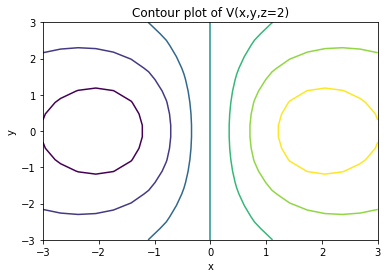

In [115]:
pyplot.contour(X,Y,v)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.title('Contour plot of V(x,y,z=2)')

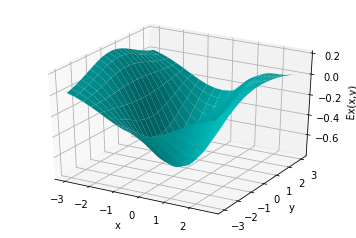

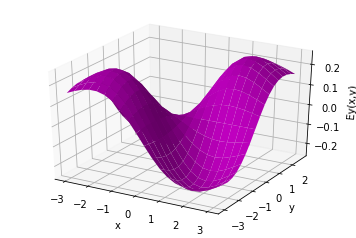

In [122]:
# electric field
Ex=-np.diff(v,axis=-1)/.3
Ey=-np.diff(v,axis=0)/.3


fig2 = pyplot.figure()
ax2 = fig2.gca(projection='3d')
X, Y = np.meshgrid(x[0:19], y)
surf = ax2.plot_surface(X, Y, Ex,shade=True,color='c')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('Ex(x,y)')


fig1 = pyplot.figure()
ax1 = fig1.gca(projection='3d')
X, Y = np.meshgrid(x, y[0:19])
surf = ax1.plot_surface(X, Y, Ey,shade=True,color='m')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('Ey(x,y)')




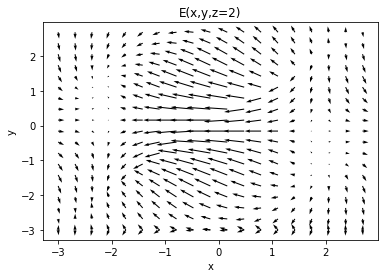

In [123]:
X, Y = np.meshgrid(x[0:19], y[0:19])
fig, ax = pyplot.subplots()
q = ax.quiver(X, Y, Ex, Ey)
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_title('E(x,y,z=2)')


